In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Tải dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu và chuyển đổi nhãn thành one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

MÔ HÌNH VỚI apha = 1

In [22]:
from scipy import sparse
import random
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.numOfAction = 10
        self.size_batch = 60000
        self.epsilon = 0.05
        self.apha = 1 # CÁC GIÁ TRỊ THỬ 0 0.1 0.2 0.5 0.7 1
    def neural_network(self):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28))) 
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10))
        model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        return model
    def predict(self,image):
        if self.model ==None:
            self.model = load_model("train.keras")
        action = np.argmax(self.model.predict(image.reshape(1,28,28),verbose = 0))
        return action
    def get_reward(self,action,index):
        #dùng index thay cho state để lấy trạng thái
        predict_number = action
        reward = -1
        if predict_number == np.argmax(self.train_labels[index]):
            reward = 1
        return reward
    def train(self):
        accuracy = []
        self.model = self.neural_network()
        for i in range(20):
            States = np.zeros((self.size_batch,784))
            for index in range(self.size_batch):
                States[index]= self.train_images[index].reshape(1,784)
            qTable = self.model.predict(States.reshape(self.size_batch,28,28),verbose = 0)
            for index in range(self.size_batch):
                if random.uniform(0, 1) < self.epsilon:
                    action = np.random.randint(0,10)
                else:
                    action = np.argmax(qTable[index])
                reward = self.get_reward(action,index)
                if reward ==-1:
                    qTable[index,action] = (1-self.apha)*qTable[index,action]+reward*self.apha
                else: qTable[index,action] = reward
            States = States.reshape(self.size_batch,28,28)
            history = self.model.fit(States,qTable,epochs = 1,batch_size = 1000,verbose = 0)
            accuracy.append(history)
        self.model.save("train.keras")
        return accuracy
                

BIỂU ĐỒ CỦA ĐỘ CHÍNH XÁC VỚI APHA = 1

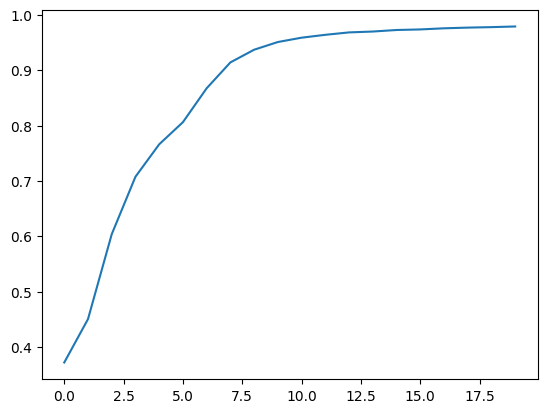

In [23]:
ag = agent(train_images,train_labels)
history = ag.train()
l = []
for i in range(20):
    l.append(history[i].history['accuracy'])
plt.plot(l)
plt.show()

MÔ HÌNH VỚI apha = 0.2

In [26]:
from scipy import sparse
import random
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.numOfAction = 10
        self.size_batch = 60000
        self.epsilon = 0.05
        self.apha = 0.2 #0 0.1 0.2 0.5 0.7 1
    def neural_network(self):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28))) 
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10))
        model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        return model
    def predict(self,image):
        if self.model ==None:
            self.model = load_model("train.keras")
        action = np.argmax(self.model.predict(image.reshape(1,28,28),verbose = 0))
        return action
    def get_reward(self,action,index):
        #dùng index thay cho state để lấy trạng thái
        predict_number = action
        reward = -1
        if predict_number == np.argmax(self.train_labels[index]):
            reward = 1
        return reward
    def train(self):
        self.model = self.neural_network()
        accuracy = []
        for i in range(20):
            States = np.zeros((self.size_batch,784))
            for index in range(self.size_batch):
                States[index]= self.train_images[index].reshape(1,784)
            qTable = self.model.predict(States.reshape(self.size_batch,28,28),verbose = 0)
            for index in range(self.size_batch):
                if random.uniform(0, 1) < self.epsilon:
                    action = np.random.randint(0,10)
                else:
                    action = np.argmax(qTable[index])
                reward = self.get_reward(action,index)
                if reward ==-1:
                    qTable[index,action] = (1-self.apha)*qTable[index,action]+reward*self.apha
                else: qTable[index,action] = reward
            States = States.reshape(self.size_batch,28,28)
            history = self.model.fit(States,qTable,epochs = 1,batch_size = 1000,verbose = 0)
            accuracy.append(history)
        self.model.save("train.keras")
        return accuracy
                

BIỂU ĐỘ CỦA ĐỘ CHÍNH XÁC VỚI apha =0.2

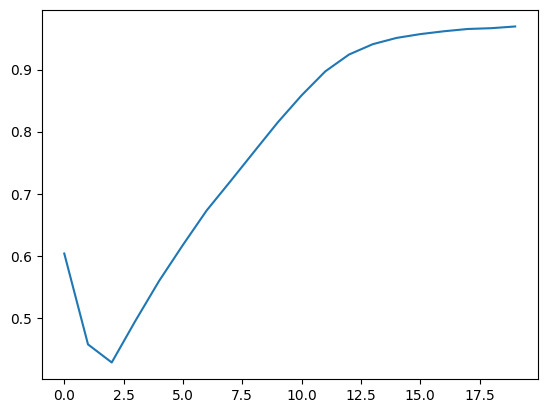

In [27]:
ag = agent(train_images,train_labels)
history = ag.train()
l = []
for i in range(20):
    l.append(history[i].history['accuracy'])
plt.plot(l)
plt.show()

THỬ TRÊN BỘ TEST

In [28]:
model = load_model("train.keras")
pre = model.predict(test_images)
count = 0
for i in range(10000):
    num = np.argmax(pre[i])
    if num==np.argmax(test_labels[i]): count+=1
print(count)

313/313 [==============================] - 1s 2ms/step
9565
